In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tracemalloc

In [45]:
plateaus = getters.get_plateaus()
fbg_cal =getters.get_fbgscal()
path_to_data = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
dates= ["20230221","20230222","20230223","20230224"]
#dates= ["20230221","20230222"]

/eos/home-d/dunetms/SWAN_projects/FBG_TMS
/eos/home-d/dunetms/SWAN_projects/FBG_TMS/ana_tools/plateaus.json
/eos/home-d/dunetms/SWAN_projects/FBG_TMS
/eos/home-d/dunetms/SWAN_projects/FBG_TMS/ana_tools/fbgs_calib.json


In [46]:
#fig, ax = plt.subplots(figsize=(10,10))
name={}
for date in dates:
    for sens in fbg_cal[date]:
        name[sens]={}
        for plateau in fbg_cal[date]:
            name[sens][plateau]=[]
            if sens in fbg_cal[date]:
                name[sens][plateau].append(fbg_cal[date][sens][plateau][0])
                continue
print(name)


KeyError: 'Wav1-2'

## Wavelenght profile

In [9]:
#Wavelength profile for all sensors in day 1
#Defining the "canvas" to make the next codebox faster
fig, ax = plt.subplots(figsize=(10,10))
data=getters.get_raw_data(path_to_data+"20230221"+"/", filetype="peaks", pol="Av")
data=data.loc[(data["Wav1-1"]>1.4e-6) &(data["Wav1-5"]>1.4e-6)&(data["Wav1-4"]>1.4e-6) ].sort_values(by="Timestamp").reset_index(drop=True)
t0=data["Timestamp"][0]
for col in data.columns:
    if col !="Timestamp":
        ax.plot(data["Timestamp"]-t0,(data[col]-data[col][0])*1e12,label=col)  
ax.legend(loc='upper right')
fig
plt.close()

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:07<00:00,  3.11it/s]


## OFFSET

/afs/cern.ch/user/d/dunetms/FBG_TMS
/afs/cern.ch/user/d/dunetms/FBG_TMS/ana_tools/plateaus.json


Reading peaks key: Av:  96%|█████████▌| 22/23 [10:10<00:27, 27.76s/it]


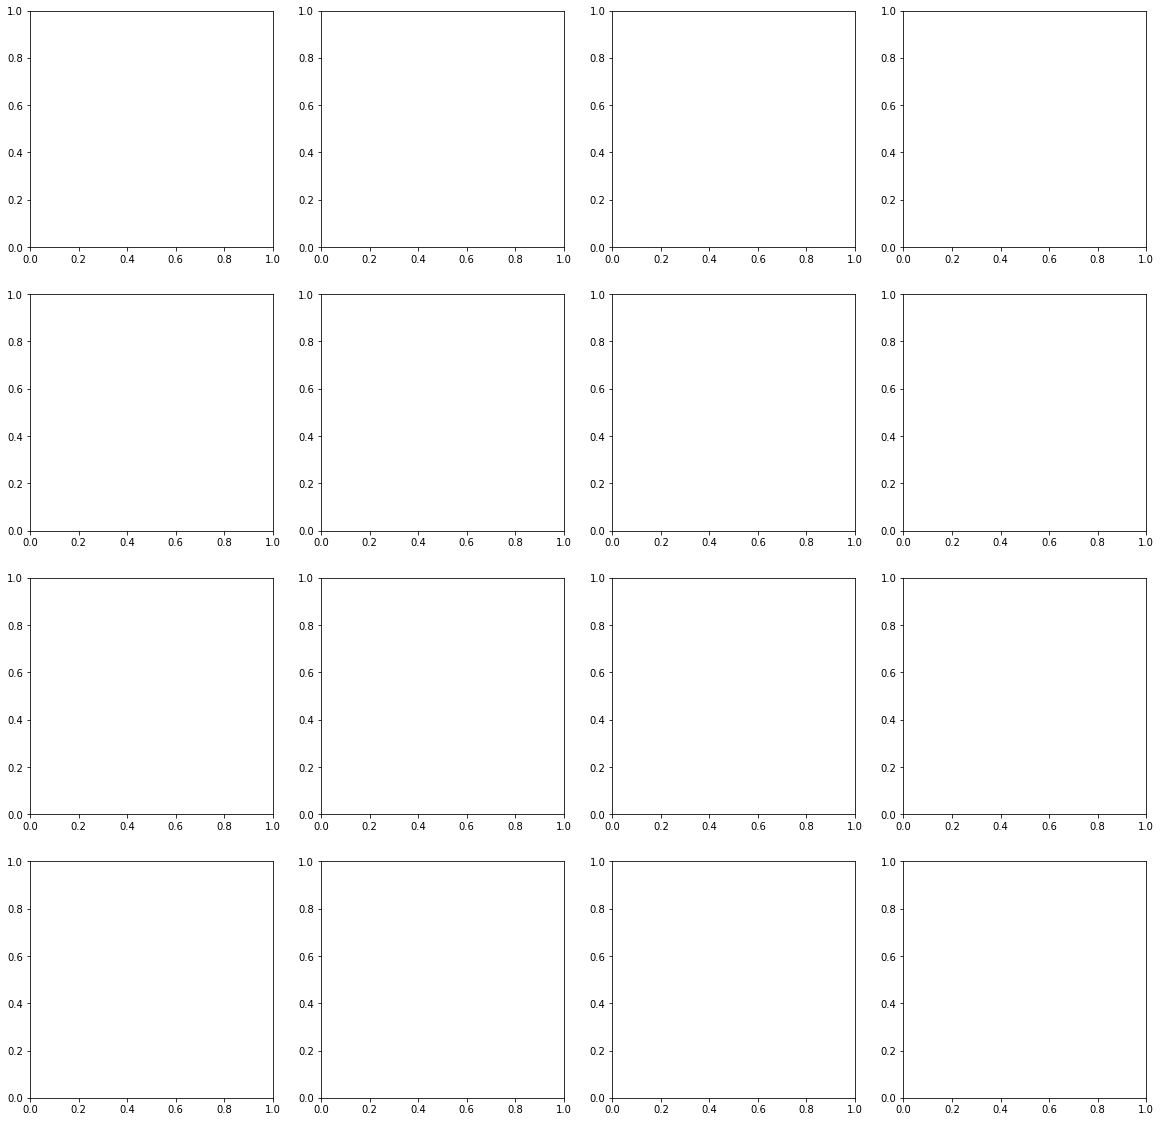

In [103]:
#Definition of the canvas
plateaus = getters.get_plateaus()
keys = list(plateaus["20230224"].keys())

fig, axes = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
ax = {}
cnt = 0
for i in axes:
    for j in i:
        try:
            ax[keys[cnt]] = j
            cnt += 1
        except:
            ax["noname"] = j
            continue

In [104]:
#Offset, all dates and all plateaus for wav1-2 wrt wav1-1
cnt=0
for date in dates:
    data = getters.get_raw_data(path_to_data+date+"/", filetype="peaks", pol="Av")
    if cnt == 0:
        wlref = data.sort_values(by="Timestamp").reset_index(drop=True)
    data_cut = tools.cut_plat(data, plateaus, date)
    for plateau in plateaus[date]:
        data_cut[plateau].sort_values(by="Timestamp").reset_index(drop=True)
        t0=data_cut[plateau]["Timestamp"][0]
        ax[plateau].plot(data_cut[plateau]["Timestamp"]-t0,
                        ((data_cut[plateau]["Wav1-1"]-wlref["Wav1-1"][0] -(data_cut[plateau]["Wav1-2"]-wlref["Wav1-2"][0]))*1e12), label=date)
        ax[plateau].set_title(plateau)
        ax[plateau].set_xlabel("Time [s]")
        ax[plateau].set_ylabel("Wavelength offset (pm)")
        ax[plateau].legend(loc="lower right")
        cnt+=1

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:15<00:00,  1.44it/s]


Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:09<00:00,  2.39it/s]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]


Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [01:47<00:00,  1.71s/it]


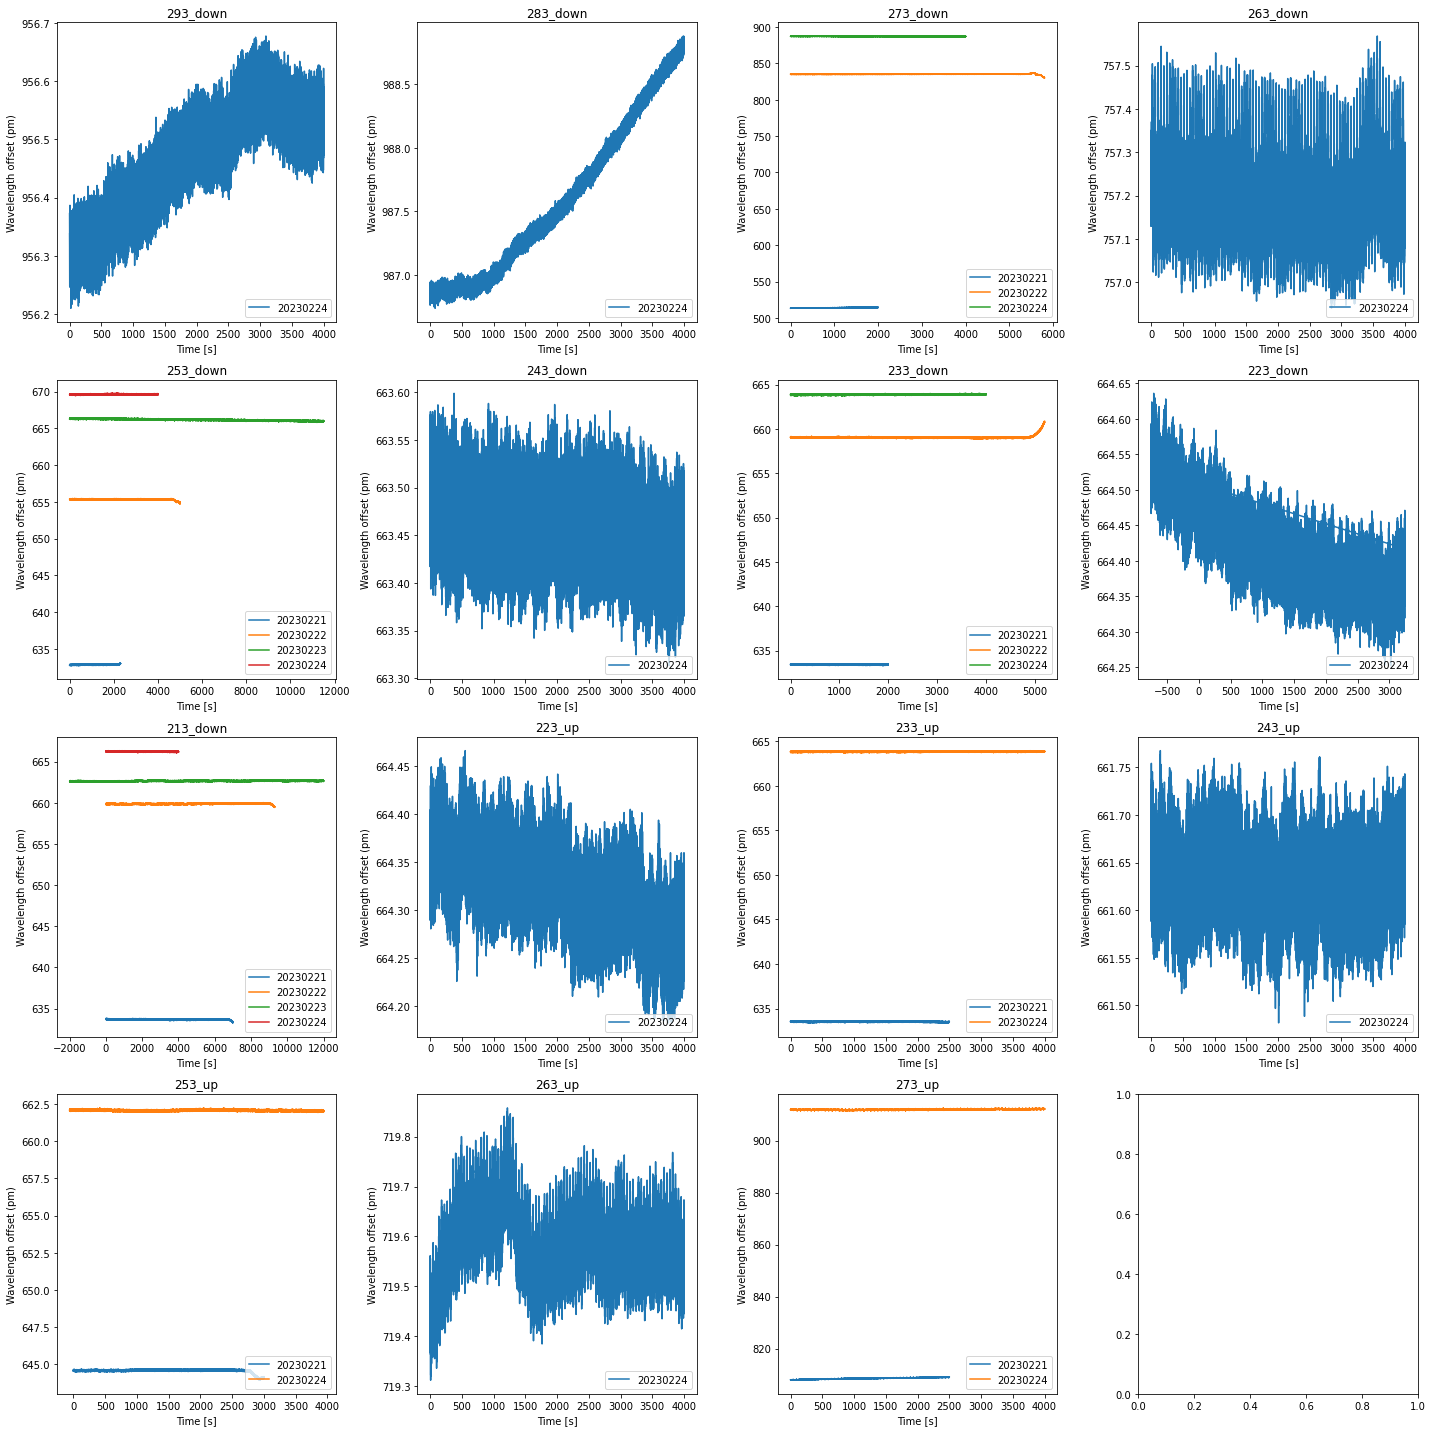

In [105]:
fig.tight_layout()
fig

In [3]:
#mean values and std of the offset in all plateuas and days for all sensor wrt wav1-1
def cut_plat(data,plateaus,date):  #function to cut data in the plateaus 
    dplat={}
    for plateau in plateaus[date]:
        t0=plateaus[date][plateau][0]
        tf=plateaus[date][plateau][1]
        dplat = data.loc[(data["Timestamp"]>t0) & (data["Timestamp"]<tf)].reset_index(drop=True)
    return dplat

plateaus = getters.get_plateaus()
offset_data={}
cnt = 0
for date in dates:
    peaks = getters.get_raw_data(path_to_data+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    data_cut= cut_plat(peaks, plateaus, date)
    if cnt == 0:
        wlref = peaks.sort_values(by="Timestamp").reset_index(drop=True)
    offset_data[date]={}
    for wav in peaks.columns:
        if wav=="Timestamp" or wav=="Wav1-1":
            continue
        offset_data[date][wav]={}
        for plateau in plateaus[date]:
            offset_data[date][wav][plateau]=[]
            offset_data[date][wav][plateau].append(1e12*np.mean(data_cut[wav]-data_cut["Wav1-1"]))
            offset_data[date][wav][plateau].append(1e12*np.std(data_cut[wav]-data_cut["Wav1-1"]))
    cnt+=1


/eos/home-d/dunetms/SWAN_projects/FBG_TMS
/eos/home-d/dunetms/SWAN_projects/FBG_TMS/ana_tools/plateaus.json
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:11<00:00,  1.96it/s]


Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [00:09<00:00,  2.30it/s]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]


Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [10:03<00:00,  9.58s/it]


In [15]:
print(offset_data['20230222']['Wav1-2'])


{'273_down': [4986.429852844746, 0.03616257598586268], '253_down': [4986.429852844746, 0.03616257598586268], '233_down': [4986.429852844746, 0.03616257598586268], '213_down': [4986.429852844746, 0.03616257598586268]}


In [24]:
print(data_cut)

            Timestamp    Wav1-1    Wav1-2    Wav1-3    Wav1-4    Wav1-5  \
0        1.677045e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
1        1.677045e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
2        1.677045e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
3        1.677045e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
4        1.677045e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
...               ...       ...       ...       ...       ...       ...   
1357475  1.677056e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
1357476  1.677056e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
1357477  1.677056e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
1357478  1.677056e+09  0.000002  0.000002  0.000002  0.000002  0.000002   
1357479  1.677056e+09  0.000002  0.000002  0.000002  0.000002  0.000002   

           Wav2-1    Wav2-2    Wav2-3    Wav2-4  
0        0.000002  0.000002  0.000002  0.000002  

Text(0.5, 1.0, 'Offsets distribution wrt to sensor 1')

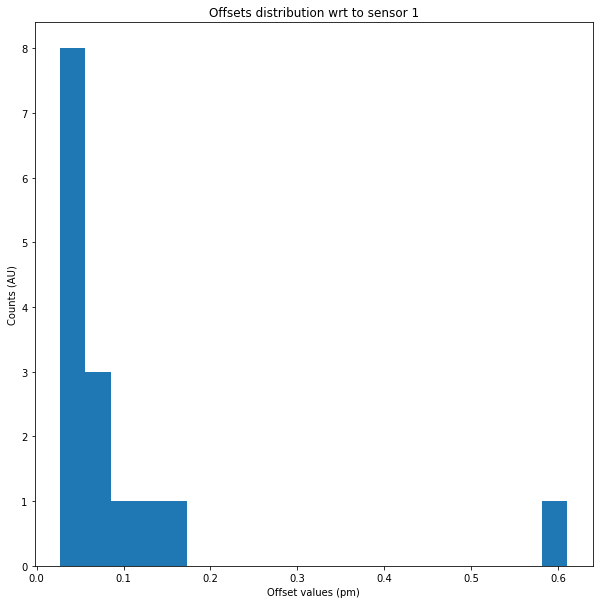

In [111]:
plt.figure(figsize=(10,10))
plt.hist(offset_std["20230224"]["Wav1-2"], bins=20, label="Offsets 1vs2")
plt.xlabel("Offset values (pm)")
plt.ylabel("Counts (AU)")
plt.title("Offsets std distribution wrt to sensor 1")

In [114]:
#Mean values and std of the offset for each sensor wrt Wav1-1

offset_m=pd.DataFrame(offset_mean)
offset_m2={}
offset_std2={}
cnt=0
for date in dates:
    for wav in offset_mean[date]:
        if cnt==0:
            offset_m2[wav]=[]
            offset_std2[wav]=[]
        offset_m2[wav].append(np.mean( offset_mean[date][wav]))
        offset_std2[wav].append(np.mean( offset_std[date][wav]))
    cnt+=1
        
    

In [115]:
print(offset_m2)
print(offset_std2)


{'Wav1-2': [642.9490541404393, 702.2995240392588, 664.4012523426966, 746.6140572833366], 'Wav1-3': [47.833654838622856, 75.8082188714313, 49.74502643207492, 143.99966809275983], 'Wav1-4': [169.78241164900535, 273.31124906796174, 130.24682524256644, 207.20405244988913], 'Wav1-5': [-16.108822234711493, 116.60528497045631, -59.13976822947433, 115.10187237093574], 'Wav2-1': [497.0152277808867, 620.7581562357539, 495.49233205231235, 502.6290772666363], 'Wav2-2': [111.5320362584795, 216.91613720533726, 122.69627654730056, 136.14571562191193], 'Wav2-3': [63.30613844559424, 128.62817716718826, 98.04345551760298, 123.31516686078744], 'Wav2-4': [464.62836746077716, 566.3164768896123, 428.90848428007996, 445.621617914211]}
{'Wav1-2': [0.11511188017524059, 0.19839469143400187, 0.06766194941319352, 0.09488343447824614], 'Wav1-3': [0.07377078789726699, 0.279931120203171, 0.0540566023463247, 0.08119095792625708], 'Wav1-4': [0.18167875724711652, 0.8238981926078913, 0.061313134956857335, 0.123600351180